<a href="https://colab.research.google.com/github/Siddhi-S-Thakur/Deep-Learning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1) / 255.0

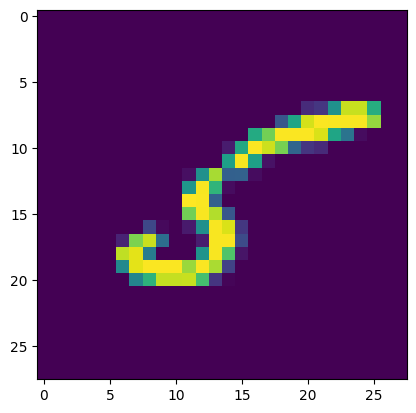

In [32]:
from matplotlib import pyplot as plt

plt.imshow(X_train[11])

In [33]:
from keras.layers import Conv2D, Flatten, Dense
from keras.layers import MaxPooling2D
from keras.models import Sequential

In [34]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

In [35]:
# model = Sequential([
#     Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
#     MaxPooling2D((2, 2)),
#     Conv2D(8, (3, 3), activation = 'relu'),
#     Flatten(),
#     Dense(10, activation = 'softmax')
# ])

In [36]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.8876 - loss: 0.3717 - val_accuracy: 0.9795 - val_loss: 0.0702
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9823 - loss: 0.0580 - val_accuracy: 0.9837 - val_loss: 0.0506
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 91s 35ms/step - accuracy: 0.9881 - loss: 0.0404 - val_accuracy: 0.9868 - val_loss: 0.0478
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9907 - loss: 0.0269 - val_accuracy: 0.9862 - val_loss: 0.0475
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9908 - val_loss: 0.0350


In [37]:
model.evaluate(X_test, y_test, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0925 - loss: 2.3050


[2.3062987327575684, 0.09860000014305115]

In [38]:
import tensorflow as tf
import numpy as np

def resize_image_tf(image_path, target_size):
    # Read the image file and decode it
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3) # Adjust channels if needed (e.g., grayscale)

    # Resize the image
    resized_img = tf.image.resize(img, target_size)

    # Optional: Normalize (scale to [0, 1])
    normalized_img = resized_img / 255.0

    # Add batch dimension
    input_tensor = tf.expand_dims(normalized_img, axis=0)

    return input_tensor

# Example usage:
# Assuming your model expects a 224x224 input
target_dims = (28, 28)
input_image_path = '/content/four.jpeg'
processed_image = resize_image_tf(input_image_path, target_dims)
processed_image = tf.image.rgb_to_grayscale(processed_image)
# processed_image = tf.expand_dims(processed_image, axis=-1)
print(f"Processed image shape for CNN: {processed_image[0].shape}")
# print(f"Processed image data type: {processed_image}")
result = model.predict(processed_image)
print((result))
final_result = ""
for i,v in enumerate(result[0]):
    print(f"{v:.2f} ",i)

    if v == np.max(result[0]):
        final_result = i
print(final_result)
    # print(f"{v:.2f} ",i)

Processed image shape for CNN: (28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[0.09716477 0.10079173 0.09240146 0.1078237  0.10665319 0.10285237
  0.09206243 0.09807629 0.10114112 0.10103296]]
0.10  0
0.10  1
0.09  2
0.11  3
0.11  4
0.10  5
0.09  6
0.10  7
0.10  8
0.10  9
3


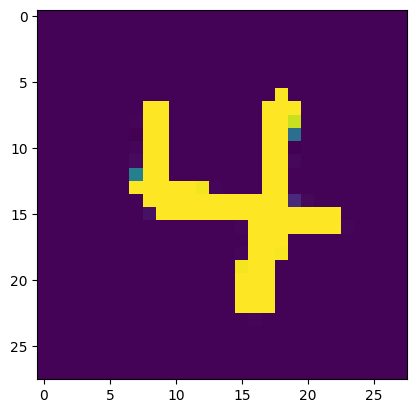

In [39]:
plt.imshow(processed_image[0])

In [40]:
import pickle as pk
with open("number_CNN_Model.pkl","wb") as file:
  pk.dump(model,file)
with open("number_CNN_Model.pkl","rb") as file:
    new_model = pk.load(file)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
